# **6. 다양한 머신러닝 기법들**
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 으뜸 파이썬 저자 : 강영민, 박동규, 김성수
*  소스코드 저장소 : https://github.com/dknife/ML2nd
*  저작권 : 본 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### **LAB6-3 비선형 SVM을 이용한 데이터 분류**

In [1]:
import pandas as pd
import numpy as np

data_loc = 'https://github.com/dknife/ML2nd/raw/main/data/'
df = pd.read_csv(data_loc + 'twisted_data.csv')
print(df.tail(5))

           x1        x2  y
995  1.112475 -0.180790  0
996 -2.544258 -0.559755  0
997 -1.044663  0.164435  1
998 -1.475026 -0.683385  0
999  1.860988  0.728986  1


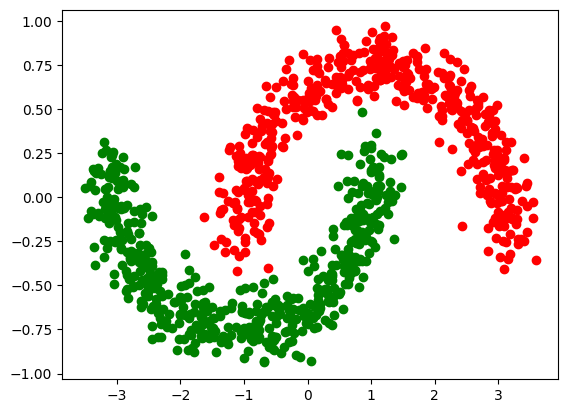

In [2]:
df_positive = df[df['y']>0]
df_negative = df[df['y']==0]

import matplotlib.pyplot as plt
plt.scatter(df_positive['x1'], df_positive['x2'], color='r')
plt.scatter(df_negative['x1'], df_negative['x2'], color='g')

In [3]:


X = df[['x1', 'x2']]
y = df['y']

In [6]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
   ("scaler", StandardScaler()),
   ("poly_features", PolynomialFeatures(degree=5)),
   ("svm_clf", LinearSVC(C=1, loss="hinge"))
])
polynomial_svm_clf.fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('poly_features', PolynomialFeatures(degree=5)),
                ('svm_clf', LinearSVC(C=1, loss='hinge'))])

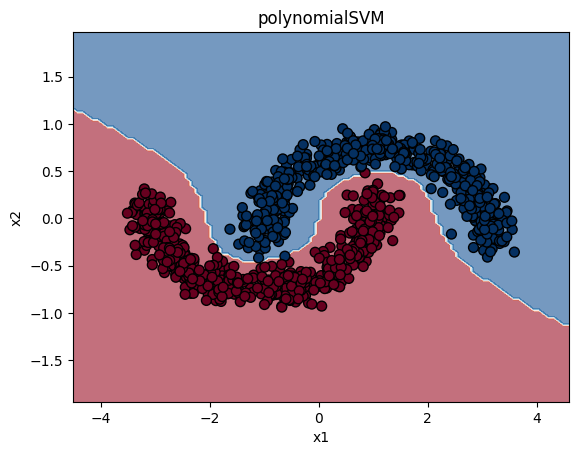

In [7]:

from sklearn.inspection import DecisionBoundaryDisplay

DecisionBoundaryDisplay.from_estimator(
    polynomial_svm_clf, X, cmap="RdBu", alpha=0.6, response_method="predict"
)
plt.scatter(X['x1'], X['x2'], c=y, cmap="RdBu", edgecolor='k', s=50)
plt.title("polynomialSVM")
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()